In [1]:
from thermopack.saftvrmie import saftvrmie
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')

# Testing effect of truncation corrections to the Lennard-Jones fluid

In [2]:
# Lennard-Jones fluid
ljf = saftvrmie("LJF")
ljf.set_tmin(temp=2.0)
ljf.set_pmin(press=1.0e2)
ljf.redefine_critical_parameters(silent=False, Tc_initials=[40], vc_initials=[1.0e-4])
models = {}
models["LJF"] = {"r_cut": "", "eos": ljf, "label": "LJF"}
trunc_models = ["5.0", "4.0", "3.5", "3.0", "2.75", "2.5"]
eps_div_kb = ljf.eps_div_kb
# Lennard-Jones fluid truncated and shifted models
for mtc in trunc_models:
    ljf_tc = saftvrmie("LJF")
    ljf_tc.set_tmin(temp=2.0)
    ljf_tc.truncation_correction(True, True, float(mtc))
    ljf_tc.redefine_critical_parameters(silent=False, Tc_initials=[40], vc_initials=[1.0e-4])
    models["LJF-"+mtc] = {"r_cut": mtc, "eos": ljf_tc, "label": "LJF-"+mtc}

In [3]:
z = np.array([1.0])
NA = 6.02214076e23
KB = 1.380650524e-23
colors = ["k", "r", "b", "brown", "g", "purple", "gray"]

In [4]:
def calc_reduced_T(Ta, eps):
    """ Calculate reduced temperature
    """
    Tstar = np.zeros_like(Ta)
    Tstar = Ta/eps
    return Tstar

def calc_reduced_rho(rhoa, sigma):
    """ Calculate reduced density
    """
    rhoStar = np.zeros_like(rhoa)
    rhoStar = sigma**3*NA*rhoa
    return rhoStar

def calc_reduced_P(Pa, eps, sigma):
    """ Calculate reduced pressure
    """
    Pstar = np.zeros_like(Pa)
    Pstar = Pa*sigma**3/eps/KB
    return Pstar

## Calculate phase envelope

In [24]:
results = {}
for m in models:
    eos = models[m]["eos"]
    T, P, v = eos.get_envelope_twophase(0.0, z, maximum_pressure=2.0e6, calc_v=True, initial_temperature=0.55*eps_div_kb, step_size_factor=0.2)
    Ts = calc_reduced_T(T, eos.eps_div_kb[0])
    rhos = calc_reduced_rho(1/v, eos.sigma[0])
    Ps = calc_reduced_P(P, eos.eps_div_kb[0], eos.sigma[0])
    Tc, vc, Pc = eos.critical(z)
    Tcs = calc_reduced_T(np.array([Tc]), eos.eps_div_kb[0])
    rhocs = calc_reduced_rho(np.array([1/vc]), eos.sigma[0])
    Pcs = calc_reduced_P(np.array([Pc]), eos.eps_div_kb[0], eos.sigma[0])
    results[m] = {"Ts": Ts,
                  "rhos": rhos,
                  "Ps": Ps,
                  "Tcs": Tcs,
                  "rhocs": rhocs,
                  "Pcs": Pcs}

## Plot phase envelope

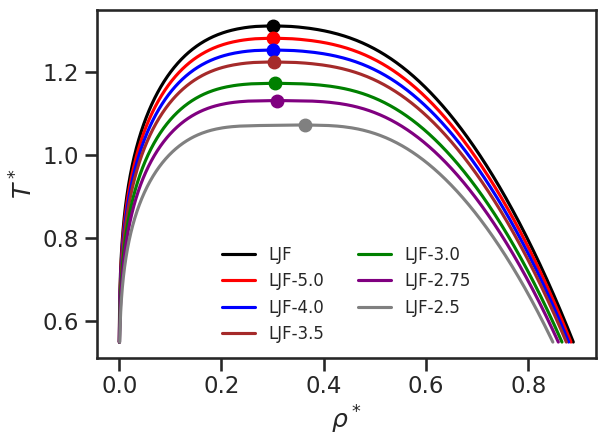

In [25]:
for ir, r in enumerate(results):
    plt.plot(results[r]["rhos"], results[r]["Ts"], color=colors[ir], label=r)
    plt.plot(results[r]["rhocs"], results[r]["Tcs"], color=colors[ir], marker="o")

plt.xlabel(r"$\rho^*$")
plt.ylabel(r"$T^*$")
leg = plt.legend(loc="best", frameon=False, fontsize=12, ncol=2)
plt.tight_layout()
plt.savefig("ljf_T_rho.pdf")
plt.show()

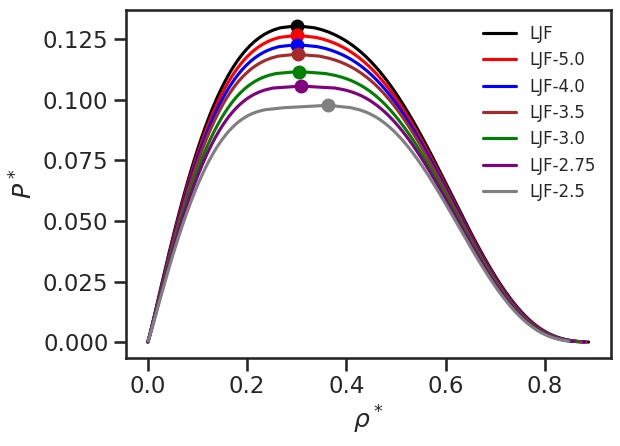

In [26]:
for ir, r in enumerate(results):
    plt.plot(results[r]["rhos"], results[r]["Ps"], color=colors[ir], label=r)
    plt.plot(results[r]["rhocs"], results[r]["Pcs"], color=colors[ir], marker="o")

plt.xlabel(r"$\rho^*$")
plt.ylabel(r"$P^*$")
leg = plt.legend(loc="best", frameon=False, fontsize=12)
plt.tight_layout()
plt.savefig("ljf_P_rho.pdf")
plt.show()

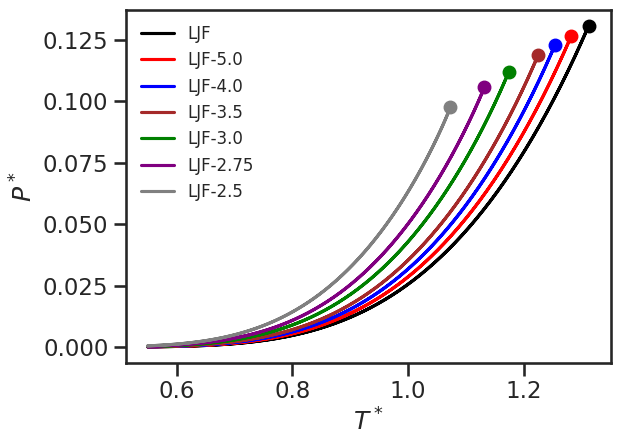

In [27]:
for ir, r in enumerate(results):
    plt.plot(results[r]["Ts"], results[r]["Ps"], color=colors[ir], label=r)
    plt.plot(results[r]["Tcs"], results[r]["Pcs"], color=colors[ir], marker="o")

plt.xlabel(r"$T^*$")
plt.ylabel(r"$P^*$")
leg = plt.legend(loc="best", frameon=False, fontsize=12)
plt.tight_layout()
plt.savefig("ljf_P_T.pdf")
plt.show()